In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from itertools import product
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
def get_dist(x, X_train):
    dist = np.apply_along_axis(lambda a: np.linalg.norm(x-a), 1, X_train)
    return dist


def get_label(x, X_train, y_train, k):
    dist = get_dist(x, X_train)
    nn_labels = [y for _, y in sorted(zip(dist, y_train))[:k]]
    counts = np.bincount(nn_labels)
    label = np.argmax(counts)
    return label


def predict(X_train, y_train, X_test, k):
    y_pred = np.apply_along_axis(get_label, 1, X_test, X_train=X_train, y_train=y_train, k=k)
    return y_pred


def accuracy(y_true, y_pred):
    return (y_pred == y_true).sum() / len(y_true)


def plot(X_train, y_train, X_test, k):
    alpha = 0.2  
    colors = ['C0', 'C1', 'C2']
    markers = ['o', 'x', '^']
    
    # Training set points
    for i in range(3):
        plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], marker=markers[i], alpha=alpha)

    # Test set points
    y_pred = predict(X_train, y_train, X_test,  k)
    for true, pred in product(range(3), range(3)):
        idx = (y_test==true) & (y_pred==pred)
        plt.scatter(X_test[idx, 0], X_test[idx, 1], marker=markers[true], c=colors[pred])

    # Identify mislabeled points
    mislabeled = plt.scatter(X_test[y_test!=y_pred, 0], X_test[y_test!=y_pred, 1], marker='o', s=150,
                facecolors='none', edgecolors='r')
    
    # Legend
    true_patches = [plt.plot([], [], c='k', marker=markers[i], ls='', alpha=alpha, label='True '+iris.target_names[i])[0] for i in range(3)]
    pred_patches = [mpatches.Patch(color=colors[i], label='Pred. '+iris.target_names[i]) for i in range(3)]
    mis_patches = [mlines.Line2D([], [], markerfacecolor='none', markeredgecolor='r', marker='o', linewidth=0, markersize=10, label='Mislabeled')]
    plt.legend(handles=true_patches+pred_patches+mis_patches)
    
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title('$k = {}$'.format(k))

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=52)

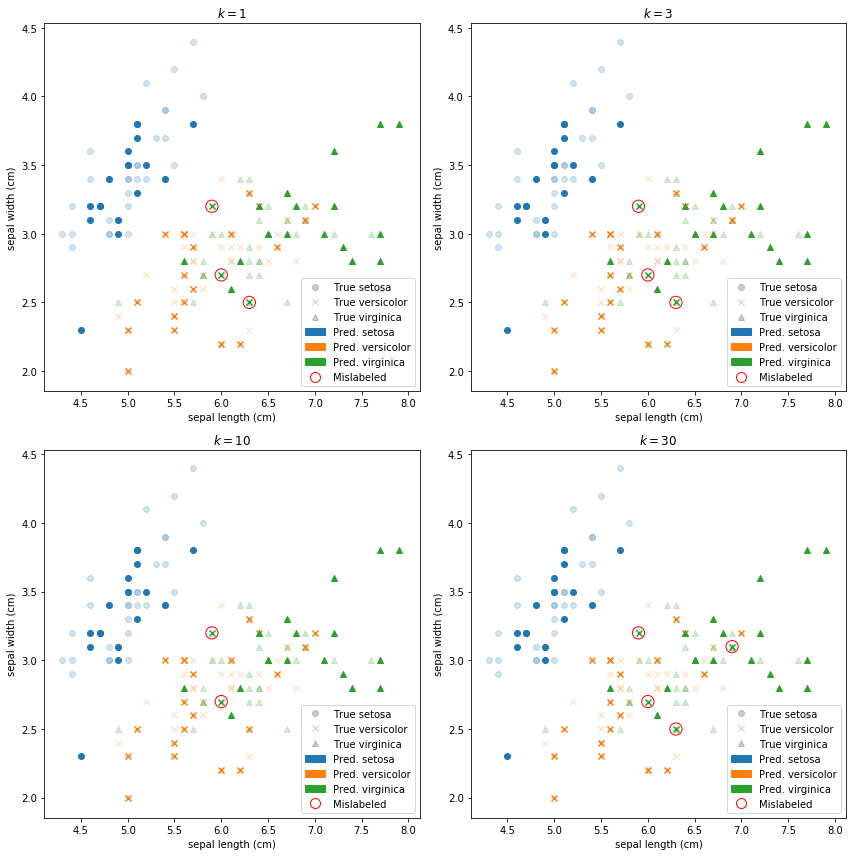

In [4]:
ks = [1, 3, 10, 30]

plt.subplots(figsize=(12, 12))
for i in range(len(ks)):
    plt.subplot(2, 2, i+1)
    plot(X_train, y_train, X_test, ks[i])
plt.tight_layout()
plt.show()

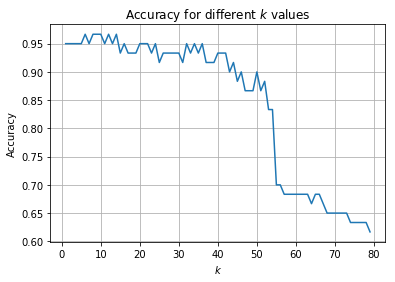

In [5]:
ks = range(1, 80)
accu = [accuracy(y_test, predict(X_train, y_train, X_test, k)) for k in ks]

plt.plot(ks, accu)
plt.title('Accuracy for different $k$ values')
plt.xlabel('$k$')
plt.ylabel('Accuracy')
plt.grid()
plt.show()